
We appreciated your help in stepping in during a bit of an exigent situation. We have a bit calmer of a task for you and one suited to a "Sun Devil." We have some basic crime data for Phoenix (here (Links to an external site.)) and we need to make better sense of it. We want to know where different kinds of crimes are occurring, in which areas crime is growing fastest (or dropping fastest), and whether certain crimes are more common in certain areas of the city. Basically, we don't need maps or anything at this stage, just some data grouped by location (either the type of location or the zip codes) and some trend data.

I mean, if you have the time for a bit of a challenge, we would love for you to bring in some other data to help draw a better picture around this. Are there some factors that affect the crime rate? If there are, we could see if there were ways to see where crime was more likely. We might even ask you to head up our new Pre-Crime unit in the Valley.

For this badge you will be working exclusively with an openly available collection of crime stats for the Phoenix area (Links to an external site.). You need to import this data and make some sense of it. That might include some combination of:

    Grouping crimes by location type or by zip code (or groups of zip codes).

    Or, on the contrary, looking at types of crimes and where they are most common.

    Would be good to know which areas have the fastest growing and shrinking crime rates.

    Might even be worth grouping crimes by violent and non-violent?

This is a fairly simple set of data and can be cut in a range of ways. Think about what useful (and "actionable") data 
might be of interest here, from the perspective of law enforcement or of residents, and how to group and gather this appropriately.

In [239]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import zipfile
import csv

In [228]:
# imported seaborn as I wanted to make my data pretty. Was not succesful but keeping this here so I can try again
# later
import seaborn as sns
sns.set(color_codes=True)

In [262]:
# this is the color palette I want to use when I sucessfully use seaborn
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

Adding link to notebook so I can reference later:

https://stackoverflow.com/questions/18016037/pandas-parsererror-eof-character-when-reading-multiple-csv-files-to-hdf5

Added the quoting=csv.QUOTE_NONE because was getting parsing error. Per stack Overflow, this will bypass that error by removing unecessary characters.

In [ ]:
crimes = pd.read_csv('crimestat.csv', quoting=csv.QUOTE_NONE)

In [211]:
# renaming column titles to remove quotation marks
crimes.rename(columns={'"OCCURRED ON"':'Occurred_On', '"OCCURRED TO"':'Occurred_To', '"ZIP"':'Zip', 
                       '"UCR CRIME CATEGORY"':'Crime_Category', '"100 BLOCK ADDR"':'Address', 
                       '"PREMISE TYPE"':'Home_Type','"INC NUMBER"':'Inc_Number'}, inplace=True)

Link that showed how to map for me to reference in the future:
https://stackoverflow.com/questions/67039036/changing-category-names-in-a-pandas-data-frame

In [215]:
# adding mapping to remove quotation marks around the types of crimes
crimes['Crime_Category'] = crimes['Crime_Category'].replace(mapping, regex=True)

In [216]:
mapping = {r'"LARCENY-THEFT"':'Larceny_Theft',r'"BURGLARY"':'Burglary',r'"MOTOR VEHICLE THEFT"':'Motor_Vehicle_Theft',
                             r'"DRUG OFFENSE"':'Drug_Offense',r'"AGGRAVATED ASSAULT"':'Aggravated_Assault',r'"ROBBERY"':'Robbery',
                             r'"RAPE"':'Rape', r'"ARSON"':'Arson', r'"MURDER AND NON-NEGLIGENT MANSLAUGHTER"':'Murder_Manslaughter'}

In [232]:
# this shows me how much data is in each column so I can determine what to group
crimes.nunique()

Inc_Number        131673
Occurred_On        83138
Occurred_To        66576
Crime_Category         9
Address            29254
Zip                   98
Home_Type             94
dtype: int64

In [213]:
# this sorts by the "Inc Number"
crimes.sort_index(inplace=True)

In [217]:
# this shows how many crimes fall into each category
crimes.Crime_Category.value_counts()

Larceny_Theft          66216
Burglary               23648
Motor_Vehicle_Theft    14391
Drug_Offense            9572
Aggravated_Assault      9306
Robbery                 5640
Rape                    1981
Arson                    634
Murder_Manslaughter      289
Name: Crime_Category, dtype: int64

df['Label'] = df['Label'].astype('category')

Series.cat.rename_categories: 
df['Label'] = df['Label'].cat.rename_categories({'zero': 0,


In [218]:
# this shows how many crimes occured in each zip code. Most interested in 85015 because it has the most.
crimes.Zip.value_counts()

"85015"    6963
"85008"    6320
"85009"    5513
"85041"    5477
"85051"    5389
           ... 
"85203"       1
"85266"       1
"85381"       1
"85268"       1
"85212"       1
Name: Zip, Length: 98, dtype: int64

In [219]:
# this shows the number of crimes by premise type
crimes.Home_Type.value_counts()

"SINGLE FAMILY HOUSE"                    25329
"APARTMENT"                              14957
"PARKING LOT"                            14148
"STREET / ROADWAY / ALLEY / SIDEWALK"    11596
"RETAIL BUSINESS"                        10852
                                         ...  
"GAMBLING FACILITY/CASINO/RACE TRACK"        2
"LAKE / WATERWAY / BEACH"                    1
"TRIBAL LANDS"                               1
"REST AREA"                                  1
"A                                           1
Name: Home_Type, Length: 94, dtype: int64

In [220]:
# grouping data by zip code
zip_code_group = crimes.groupby('Zip')

In [221]:
# this shows the crimes in the zip code 85015, which had the most occurances
zip_code_group.get_group('"85015"')

,Inc_Number,Occurred_On,Occurred_To,Crime_Category,Address,Zip,Home_Type
17,"""201500002102467""",11/01/2015 00:01,11/01/2015 11:15,Larceny_Theft,"""65XX N 17TH AVE""","""85015""","""VEHICLE"""
49,"""201500002102369""",11/01/2015 07:50,11/01/2015 11:00,Larceny_Theft,"""34XX N 23RD AVE""","""85015""","""SINGLE FAMILY HOUSE"""
70,"""201500002109064""",11/01/2015 12:00,11/02/2015 05:30,Motor_Vehicle_Theft,"""47XX N BLACK CANYON AC""","""85015""","""APARTMENT"""
150,"""201500002118996""",11/01/2015 21:00,11/01/2015 22:30,Motor_Vehicle_Theft,"""21XX W FLOWER ST""","""85015""","""PARKING LOT"""
157,"""201500002113992""",11/01/2015 23:00,11/02/2015 06:30,Rape,"""20XX W BETHANY HOME RD""","""85015""","""APARTMENT"""
...,...,...,...,...,...,...,...
131603,"""201700002022605""",11/16/2017 19:00,NaN,Aggravated_Assault,"""17XX W MISSOURI AVE""","""85015""","""PARKING LOT"""
131605,"""201700002025317""",11/16/2017 19:30,11/17/2017 07:30,Larceny_Theft,"""24XX W CAMPBELL AVE""","""85015""","""PARKING LOT"""
131607,"""201700002032749""",11/16/2017 19:46,NaN,Larceny_Theft,"""17XX W BETHANY HOME RD""","""85015""","""RETAIL BUSINESS"""
131626,"""201700002023396""",11/16/2017 21:46,11/16/2017 21:46,Larceny_Theft,"""56XX N 17TH AVE""","""85015""","""PARK / PLAYGROUND"""


In [223]:
# grouping by home type to get more insight
home_type_group = crimes.groupby('Home_Type')

In [224]:
# chose to see this group as single family house had the highest number of crimes
home_type_group.get_group('"SINGLE FAMILY HOUSE"')

,Inc_Number,Occurred_On,Occurred_To,Crime_Category,Address,Zip,Home_Type
0,"""201600000052855""",11/01/2015 00:00,01/09/2016 00:00,Motor_Vehicle_Theft,"""N 43RD AVE & W CACTUS RD""","""85029""","""SINGLE FAMILY HOUSE"""
1,"""201600000594484""",11/01/2015 00:00,NaN,Rape,"""13XX E ALMERIA RD""","""85006""","""SINGLE FAMILY HOUSE"""
3,"""201500002101405""",11/01/2015 00:00,11/01/2015 05:00,Motor_Vehicle_Theft,"""102XX W MEDLOCK AVE""","""85307""","""SINGLE FAMILY HOUSE"""
4,"""201500002102668""",11/01/2015 00:00,11/01/2015 11:50,Motor_Vehicle_Theft,"""69XX W WOOD ST""","""85043""","""SINGLE FAMILY HOUSE"""
6,"""201700001722914""",11/01/2015 00:00,NaN,Larceny_Theft,"""279XX N 23RD LN""","""85085""","""SINGLE FAMILY HOUSE"""
...,...,...,...,...,...,...,...
131641,"""201700002025688""",11/16/2017 23:00,11/17/2017 05:30,Motor_Vehicle_Theft,"""33XX W FRAKTUR RD""","""85041""","""SINGLE FAMILY HOUSE"""
131648,"""201700002091707""",11/17/2017 00:00,11/25/2017 00:00,Burglary,"""4XX E CAROL ANN WAY""","""85022""","""SINGLE FAMILY HOUSE"""
131652,"""201700002069932""",11/17/2017 00:00,11/24/2017 12:02,Burglary,"""192XX N 22ND LN""","""85027""","""SINGLE FAMILY HOUSE"""
131666,"""201700002024295""",11/17/2017 02:48,11/17/2017 02:48,Burglary,"""166XX N 29TH DR""","""85053""","""SINGLE FAMILY HOUSE"""


In [226]:
# second highest number of crimes within premise type category
home_type_group.get_group('"APARTMENT"')

,Inc_Number,Occurred_On,Occurred_To,Crime_Category,Address,Zip,Home_Type
2,"""201500002102327""",11/01/2015 00:00,11/01/2015 09:00,Larceny_Theft,"""51XX N 15TH ST""","""85014""","""APARTMENT"""
9,"""201500002103724""",11/01/2015 00:00,11/01/2015 15:21,Drug_Offense,"""54XX W INDIAN SCHOOL RD""","""85031""","""APARTMENT"""
36,"""201500002102927""",11/01/2015 04:00,11/01/2015 10:00,Larceny_Theft,"""176XX N 7TH ST""","""85022""","""APARTMENT"""
41,"""201500002126247""",11/01/2015 05:00,11/02/2015 16:00,Burglary,"""17XX W DESERT COVE AVE""","""85029""","""APARTMENT"""
59,"""201500002101936""",11/01/2015 09:43,NaN,Drug_Offense,"""9XX S 17TH AVE""","""85007""","""APARTMENT"""
...,...,...,...,...,...,...,...
131619,"""201700002023142""",11/16/2017 20:45,NaN,Aggravated_Assault,"""2XX W CLARENDON AVE""","""85013""","""APARTMENT"""
131621,"""201700002024423""",11/16/2017 21:00,11/17/2017 03:30,Burglary,"""38XX N 43RD AVE""","""85031""","""APARTMENT"""
131660,"""201700002032068""",11/17/2017 01:00,11/17/2017 06:00,Motor_Vehicle_Theft,"""200XX N 23RD AVE""","""85027""","""APARTMENT"""
131667,"""201700002024361""",11/17/2017 03:00,11/17/2017 03:20,Aggravated_Assault,"""6XX E TOWNLEY AVE""","""85020""","""APARTMENT"""


<AxesSubplot:xlabel='Zip', ylabel='Count'>

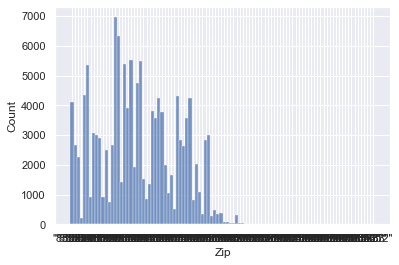

In [250]:
# sns is for seaborn, plot shows the number of crimes by zip code. 
# (Future Mali, look up how to make the graph more readable)
sns.histplot(crimes['Zip'])

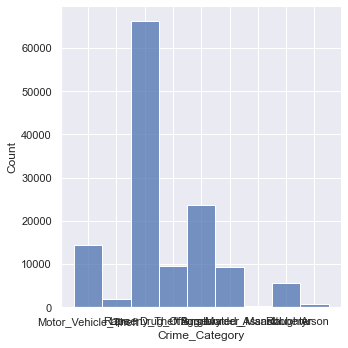

In [271]:
# bar that show the number of crimes by category
sns.displot(crimes['Crime_Category'])

<AxesSubplot:xlabel='Zip', ylabel='Crime_Category'>

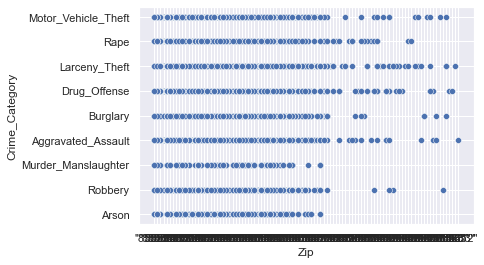

In [272]:
# scatter plot shows the number of each crime type by zip code
sns.scatterplot(x=crimes['Zip'], y=crimes['Crime_Category'])